In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [99]:
df=pd.read_csv('/home/abhaylal/Desktop/Projects/4406b380-4ee6-4320-955b-eb9e6e2f0f44/forecast-data.csv')

In [100]:
df

,TIME,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash
0,1978-01,6.4,6.837607,8.28,93.82,95.15,88.02,89.25,47.8693,7.956190,0
1,1978-02,6.3,6.429780,8.16,89.93,91.32,86.58,87.04,48.1283,8.033333,0
2,1978-03,6.3,6.554622,8.13,87.19,91.35,86.45,89.21,49.0553,8.035909,0
3,1978-04,6.1,6.500000,8.41,88.46,97.91,88.07,96.83,50.0260,8.154000,0
4,1978-05,6.0,6.965174,8.75,97.67,100.32,94.57,97.24,50.2717,8.345714,0
...,...,...,...,...,...,...,...,...,...,...,...
523,2021-08,5.2,5.251272,26.23,4406.86,4537.36,4367.73,4522.68,100.8370,1.283182,0
524,2021-09,4.7,5.390349,24.39,4528.80,4545.85,4305.91,4307.54,99.8498,1.374762,0
525,2021-10,4.6,6.221869,24.52,4317.16,4608.08,4278.94,4605.38,101.3602,1.582500,0
526,2021-11,4.2,6.809003,23.63,4610.62,4743.83,4560.00,4567.00,101.9610,1.559500,0


In [101]:
df['TIME']=pd.to_datetime(df['TIME'])


In [102]:
df.set_index('TIME',inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 528 entries, 1978-01-01 to 2021-12-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unemployment           528 non-null    float64
 1   CPI                    528 non-null    float64
 2   P/E                    528 non-null    float64
 3   Open                   528 non-null    float64
 4   High                   528 non-null    float64
 5   Low                    528 non-null    float64
 6   Close                  528 non-null    float64
 7   Industrial Production  528 non-null    float64
 8   Treasury               528 non-null    float64
 9   Crash                  528 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 45.4 KB


<AxesSubplot:xlabel='TIME'>

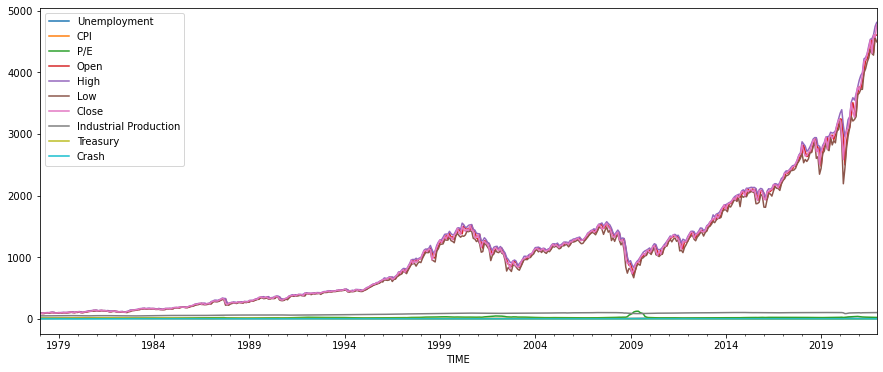

In [104]:
df.plot(figsize=(15,6))

<AxesSubplot:xlabel='TIME'>

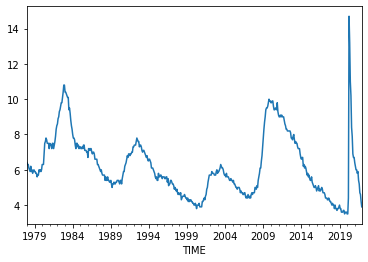

In [105]:
df['Unemployment'].plot()

<AxesSubplot:xlabel='TIME'>

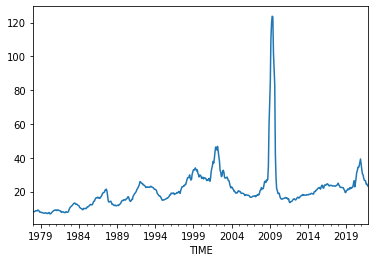

In [106]:

df['P/E'].plot()

<AxesSubplot:>

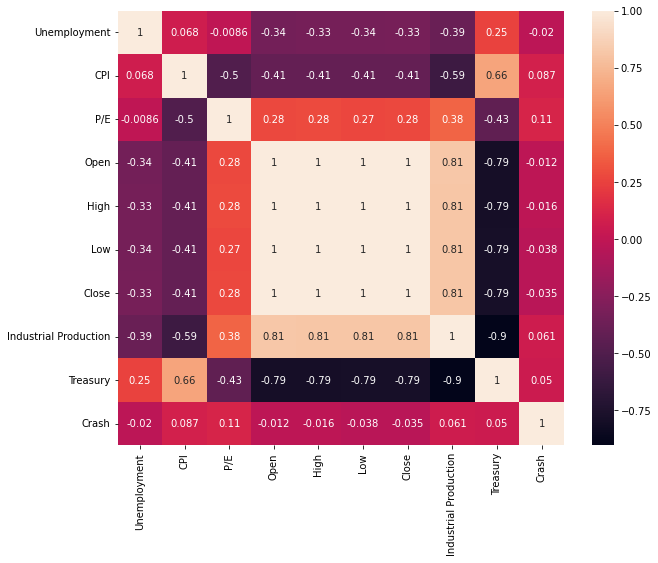

In [107]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='TIME'>

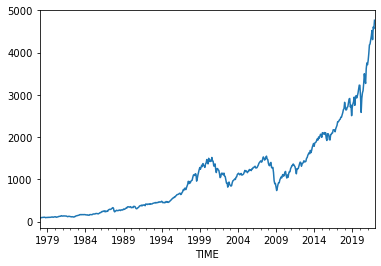

In [108]:
df['Close'].plot()

In [109]:
from statsmodels.tsa.stattools import adfuller

In [110]:
test_result=adfuller(df['Close'])


In [111]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [112]:
adfuller_test(df['Industrial Production'])

ADF Test Statistic : -0.9596954907116628
p-value : 0.7676792585054575
#Lags Used : 11
Number of Observations Used : 516
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [113]:
adfuller_test(df['Treasury'])

ADF Test Statistic : -0.8387719433601132
p-value : 0.807467036443323
#Lags Used : 15
Number of Observations Used : 512
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [125]:
adfuller_test(df['Unemployment'])

ADF Test Statistic : -3.101671847651276
p-value : 0.0264297114142336
#Lags Used : 2
Number of Observations Used : 525
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [119]:
df['Treasury First Difference'] = df['Treasury'] - df['Treasury'].shift(12)
adfuller_test(df['Treasury First Difference'].dropna())

ADF Test Statistic : -5.095576447230681
p-value : 1.4308979474124945e-05
#Lags Used : 17
Number of Observations Used : 498
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [122]:
adfuller_test(df['CPI'])

ADF Test Statistic : -2.9796207491247495
p-value : 0.03684189403920003
#Lags Used : 15
Number of Observations Used : 512
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [76]:
adfuller_test(df['Open'])

ADF Test Statistic : -0.9596954907116628
p-value : 0.7676792585054575
#Lags Used : 11
Number of Observations Used : 516
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
df['Open First Difference'] = df['Open'] - df['Open'].shift(12)


In [17]:
adfuller_test(df['Open First Difference'].dropna())

ADF Test Statistic : -3.164797289760594
p-value : 0.022114935318150567
#Lags Used : 17
Number of Observations Used : 498
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [18]:
df['High First Difference'] = df['High'] - df['High'].shift(12)
adfuller_test(df['High First Difference'].dropna())


ADF Test Statistic : -2.512217734443141
p-value : 0.11252984817025796
#Lags Used : 16
Number of Observations Used : 499
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
df['Low First Difference'] = df['Low'] - df['Low'].shift(12)
adfuller_test(df['Low First Difference'].dropna())

ADF Test Statistic : -2.968711741534371
p-value : 0.037921449878484635
#Lags Used : 17
Number of Observations Used : 498
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [20]:
df['Close First Difference'] = df['Close'] - df['Close'].shift(12)
adfuller_test(df['Close First Difference'].dropna())

ADF Test Statistic : -2.7633112441747634
p-value : 0.06370861333156698
#Lags Used : 17
Number of Observations Used : 498
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


In [22]:
model=sm.tsa.statespace.SARIMAX(df['Open'],order=(1, 1, 1),seasonal_order=(1,1,1,12))

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56465D+00    |proj g|=  3.90533D-02

At iterate    5    f=  5.53884D+00    |proj g|=  3.09276D-02

At iterate   10    f=  5.53304D+00    |proj g|=  1.32822D-02

At iterate   15    f=  5.46501D+00    |proj g|=  9.20070D-03

At iterate   20    f=  5.45738D+00    |proj g|=  4.45527D-03

At iterate   25    f=  5.45534D+00    |proj g|=  2.86256D-03

At iterate   30    f=  5.45503D+00    |proj g|=  2.74446D-04

At iterate   35    f=  5.45488D+00    |proj g|=  1.81374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected 

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [35]:
future_datest_df

,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
future_df=pd.concat([df,future_datest_df])


In [82]:
future_df

,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.28,93.820000,95.150000,88.020000,89.250000,NaN,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.16,89.930000,91.320000,86.580000,87.040000,NaN,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.13,87.190000,91.350000,86.450000,89.210000,NaN,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.41,88.460000,97.910000,88.070000,96.830000,NaN,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.75,97.670000,100.320000,94.570000,97.240000,NaN,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,NaN,5333.735302,6123.066238,4854.877866,5679.917462,2.529875,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,5378.280663,6192.079911,4874.180608,5725.695979,2.196490,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,5412.659218,6252.333515,4873.435750,5743.119730,1.836117,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,5434.171555,6318.427118,4848.255814,5797.619473,2.129925,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
a=df["Open"]

In [43]:
b=results.predict(start=529,end=554,dynamic=True)

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [48]:
future_df['Open']=a.append(b)

/tmp/ipykernel_23819/584203353.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df['Open']=a.append(b)


In [49]:
future_df

,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.28,93.820000,95.15,88.02,89.25,47.8693,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.16,89.930000,91.32,86.58,87.04,48.1283,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.13,87.190000,91.35,86.45,89.21,49.0553,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.41,88.460000,97.91,88.07,96.83,50.0260,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.75,97.670000,100.32,94.57,97.24,50.2717,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,NaN,5333.735302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,5378.280663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,5412.659218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,5434.171555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
    from pandas.tseries.offsets import DateOffset
    future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
    future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
    future_df=pd.concat([df,future_datest_df])

In [63]:
## Low

In [64]:
def myfn(df,x): 
    model=sm.tsa.statespace.SARIMAX(df[x],order=(1, 1, 1),seasonal_order=(1,1,1,12))
    results=model.fit()
    a=df[x]
    b=results.predict(start=529,end=554,dynamic=True)
    future_df[x]=a.append(b)
    return future_df

In [65]:
myfn(df,"Open")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56465D+00    |proj g|=  3.90533D-02

At iterate    5    f=  5.53884D+00    |proj g|=  3.09276D-02

At iterate   10    f=  5.53304D+00    |proj g|=  1.32822D-02

At iterate   15    f=  5.46501D+00    |proj g|=  9.20070D-03

At iterate   20    f=  5.45738D+00    |proj g|=  4.45527D-03

At iterate   25    f=  5.45534D+00    |proj g|=  2.86256D-03

At iterate   30    f=  5.45503D+00    |proj g|=  2.74446D-04

At iterate   35    f=  5.45488D+00    |proj g|=  1.81374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected 

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/tmp/ipykernel_23819/3298502672.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df[x]=a.append(b)


,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.28,93.820000,95.15,88.02,89.25,47.8693,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.16,89.930000,91.32,86.58,87.04,48.1283,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.13,87.190000,91.35,86.45,89.21,49.0553,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.41,88.460000,97.91,88.07,96.83,50.0260,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.75,97.670000,100.32,94.57,97.24,50.2717,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,NaN,5333.735302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,5378.280663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,5412.659218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,5434.171555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
myfn(df,"Low")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65258D+00    |proj g|=  5.51341D-02

At iterate    5    f=  5.63081D+00    |proj g|=  6.15014D-03

At iterate   10    f=  5.56388D+00    |proj g|=  1.07841D-01

At iterate   15    f=  5.55346D+00    |proj g|=  8.16554D-04

At iterate   20    f=  5.55332D+00    |proj g|=  3.16755D-03

At iterate   25    f=  5.55329D+00    |proj g|=  9.31565D-04

At iterate   30    f=  5.55321D+00    |proj g|=  6.26986D-03

At iterate   35    f=  5.55301D+00    |proj g|=  6.76328D-05
  ys=-6.876E-03  -gs= 2.018E-04 BFGS update SKIPPED

At iterate   40    f=  5.54820D+00    |proj g|=  3.71258D-02

At iterate   45    f=  5.54709D+00    |proj g|=  1.91565D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segmen

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/tmp/ipykernel_23819/3298502672.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df[x]=a.append(b)


,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.28,93.820000,95.15,88.020000,89.25,47.8693,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.16,89.930000,91.32,86.580000,87.04,48.1283,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.13,87.190000,91.35,86.450000,89.21,49.0553,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.41,88.460000,97.91,88.070000,96.83,50.0260,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.75,97.670000,100.32,94.570000,97.24,50.2717,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,NaN,5333.735302,NaN,4854.877866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,5378.280663,NaN,4874.180608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,5412.659218,NaN,4873.435750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,5434.171555,NaN,4848.255814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
from statsmodels.tsa.arima.model import ARIMA


In [73]:
def arima(df,x): 
    model=ARIMA(df[x],order=(1, 1, 1),seasonal_order=(1,1,1,12))
    results=model.fit()
    a=df[x]
    b=results.predict(start=529,end=554,dynamic=True)
    future_df[x]=a.append(b)
    return future_df

In [74]:
arima(df,"High")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/tmp/ipykernel_23819/1432135169.py:6: FutureWarning: The series.append method is depreca

,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.28,93.820000,95.150000,88.020000,89.25,47.8693,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.16,89.930000,91.320000,86.580000,87.04,48.1283,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.13,87.190000,91.350000,86.450000,89.21,49.0553,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.41,88.460000,97.910000,88.070000,96.83,50.0260,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.75,97.670000,100.320000,94.570000,97.24,50.2717,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,NaN,5333.735302,6123.066238,4854.877866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,5378.280663,6192.079911,4874.180608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,5412.659218,6252.333515,4873.435750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,5434.171555,6318.427118,4848.255814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
arima(df,"Close")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic pr

,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.28,93.820000,95.150000,88.020000,89.250000,47.8693,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.16,89.930000,91.320000,86.580000,87.040000,48.1283,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.13,87.190000,91.350000,86.450000,89.210000,49.0553,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.41,88.460000,97.910000,88.070000,96.830000,50.0260,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.75,97.670000,100.320000,94.570000,97.240000,50.2717,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,NaN,5333.735302,6123.066238,4854.877866,5679.917462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,5378.280663,6192.079911,4874.180608,5725.695979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,5412.659218,6252.333515,4873.435750,5743.119730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,5434.171555,6318.427118,4848.255814,5797.619473,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
myfn(df,"Industrial Production")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81902D+00    |proj g|=  3.47065D-01

At iterate    5    f=  1.58959D+00    |proj g|=  2.13216D-02

At iterate   10    f=  1.57674D+00    |proj g|=  1.44632D-02

At iterate   15    f=  1.57425D+00    |proj g|=  2.28756D-03

At iterate   20    f=  1.57383D+00    |proj g|=  1.41644D-03

At iterate   25    f=  1.57377D+00    |proj g|=  1.15734D-03

At iterate   30    f=  1.57376D+00    |proj g|=  6.95134D-04

At iterate   35    f=  1.57376D+00    |proj g|=  2.22493D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected 

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/tmp/ipykernel_23819/3298502672.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df[x]=a.append(b)


,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.28,93.820000,95.150000,88.020000,89.250000,NaN,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.16,89.930000,91.320000,86.580000,87.040000,NaN,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.13,87.190000,91.350000,86.450000,89.210000,NaN,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.41,88.460000,97.910000,88.070000,96.830000,NaN,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.75,97.670000,100.320000,94.570000,97.240000,NaN,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,NaN,5333.735302,6123.066238,4854.877866,5679.917462,2.529875,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,5378.280663,6192.079911,4874.180608,5725.695979,2.196490,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,5412.659218,6252.333515,4873.435750,5743.119730,1.836117,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,5434.171555,6318.427118,4848.255814,5797.619473,2.129925,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
arima(df,"Industrial Production")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/tmp/ipykernel_23819/1432135169.py:6: FutureWarning: The series.append method is depreca

,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.28,93.820000,95.150000,88.020000,89.250000,47.869300,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.16,89.930000,91.320000,86.580000,87.040000,48.128300,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.13,87.190000,91.350000,86.450000,89.210000,49.055300,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.41,88.460000,97.910000,88.070000,96.830000,50.026000,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.75,97.670000,100.320000,94.570000,97.240000,50.271700,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,NaN,5333.735302,6123.066238,4854.877866,5679.917462,102.810898,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,5378.280663,6192.079911,4874.180608,5725.695979,103.007188,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,5412.659218,6252.333515,4873.435750,5743.119730,102.865127,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,5434.171555,6318.427118,4848.255814,5797.619473,103.137058,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
arima(df,"Treasury")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/tmp/ipykernel_23819/1432135169.py:6: FutureWarning: The series.append method is depreca

,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.28,93.820000,95.150000,88.020000,89.250000,47.869300,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.16,89.930000,91.320000,86.580000,87.040000,48.128300,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.13,87.190000,91.350000,86.450000,89.210000,49.055300,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.41,88.460000,97.910000,88.070000,96.830000,50.026000,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.75,97.670000,100.320000,94.570000,97.240000,50.271700,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,NaN,5333.735302,6123.066238,4854.877866,5679.917462,102.810898,1.314913,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,5378.280663,6192.079911,4874.180608,5725.695979,103.007188,1.261806,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,5412.659218,6252.333515,4873.435750,5743.119730,102.865127,1.220231,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,5434.171555,6318.427118,4848.255814,5797.619473,103.137058,1.196080,NaN,NaN,NaN,NaN,NaN


In [123]:
myfn(df,"P/E")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42749D+00    |proj g|=  1.18875D-01

At iterate    5    f=  2.29586D+00    |proj g|=  3.10262D-02

At iterate   10    f=  2.28395D+00    |proj g|=  1.62391D-02

At iterate   15    f=  2.28161D+00    |proj g|=  3.25461D-03

At iterate   20    f=  2.28132D+00    |proj g|=  1.11832D-03

At iterate   25    f=  2.28129D+00    |proj g|=  2.44922D-04

At iterate   30    f=  2.28129D+00    |proj g|=  4.33798D-05

At iterate   35    f=  2.28129D+00    |proj g|=  2.77274D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected 

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/tmp/ipykernel_23819/3298502672.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df[x]=a.append(b)


,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.280000,93.820000,95.150000,88.020000,89.250000,47.869300,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.160000,89.930000,91.320000,86.580000,87.040000,48.128300,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.130000,87.190000,91.350000,86.450000,89.210000,49.055300,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.410000,88.460000,97.910000,88.070000,96.830000,50.026000,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.750000,97.670000,100.320000,94.570000,97.240000,50.271700,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,NaN,20.301656,5333.735302,6123.066238,4854.877866,5679.917462,102.810898,1.314913,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,20.033512,5378.280663,6192.079911,4874.180608,5725.695979,103.007188,1.261806,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,19.596839,5412.659218,6252.333515,4873.435750,5743.119730,102.865127,1.220231,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,18.665030,5434.171555,6318.427118,4848.255814,5797.619473,103.137058,1.196080,NaN,NaN,NaN,NaN,NaN


In [124]:
myfn(df,"CPI")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.06511D-01    |proj g|=  1.03781D+00

At iterate    5    f=  3.54479D-01    |proj g|=  1.64206D-01

At iterate   10    f=  3.04317D-01    |proj g|=  4.27167D-02

At iterate   15    f=  2.97748D-01    |proj g|=  1.78356D-02

At iterate   20    f=  2.96832D-01    |proj g|=  2.49994D-03

At iterate   25    f=  2.96721D-01    |proj g|=  4.05906D-04

At iterate   30    f=  2.96711D-01    |proj g|=  7.57008D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N 

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/tmp/ipykernel_23819/3298502672.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df[x]=a.append(b)


,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.4,6.837607,8.280000,93.820000,95.150000,88.020000,89.250000,47.869300,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.3,6.429780,8.160000,89.930000,91.320000,86.580000,87.040000,48.128300,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.3,6.554622,8.130000,87.190000,91.350000,86.450000,89.210000,49.055300,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.1,6.500000,8.410000,88.460000,97.910000,88.070000,96.830000,50.026000,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.0,6.965174,8.750000,97.670000,100.320000,94.570000,97.240000,50.271700,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,NaN,5.168087,20.301656,5333.735302,6123.066238,4854.877866,5679.917462,102.810898,1.314913,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,5.136476,20.033512,5378.280663,6192.079911,4874.180608,5725.695979,103.007188,1.261806,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,5.167533,19.596839,5412.659218,6252.333515,4873.435750,5743.119730,102.865127,1.220231,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,5.377227,18.665030,5434.171555,6318.427118,4848.255814,5797.619473,103.137058,1.196080,NaN,NaN,NaN,NaN,NaN


In [126]:
myfn(df,"Unemployment")

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10
 This problem is unconstrained.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46500D-01    |proj g|=  6.53195D-01

At iterate    5    f=  7.57776D-01    |proj g|=  1.84205D-02

At iterate   10    f=  7.52760D-01    |proj g|=  7.50064D-02

At iterate   15    f=  7.50583D-01    |proj g|=  5.42181D-03

At iterate   20    f=  7.48437D-01    |proj g|=  1.34323D-01

At iterate   25    f=  7.45927D-01    |proj g|=  6.77597D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5    

/home/abhaylal/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/tmp/ipykernel_23819/3298502672.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df[x]=a.append(b)


,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury,Crash,Open First Difference,High First Difference,Low First Difference,Close First Difference
1978-01-01,6.400000,6.837607,8.280000,93.820000,95.150000,88.020000,89.250000,47.869300,7.956190,0,NaN,NaN,NaN,NaN
1978-02-01,6.300000,6.429780,8.160000,89.930000,91.320000,86.580000,87.040000,48.128300,8.033333,0,NaN,NaN,NaN,NaN
1978-03-01,6.300000,6.554622,8.130000,87.190000,91.350000,86.450000,89.210000,49.055300,8.035909,0,NaN,NaN,NaN,NaN
1978-04-01,6.100000,6.500000,8.410000,88.460000,97.910000,88.070000,96.830000,50.026000,8.154000,0,NaN,NaN,NaN,NaN
1978-05-01,6.000000,6.965174,8.750000,97.670000,100.320000,94.570000,97.240000,50.271700,8.345714,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,4.717908,5.168087,20.301656,5333.735302,6123.066238,4854.877866,5679.917462,102.810898,1.314913,NaN,NaN,NaN,NaN,NaN
2023-08-01,4.415398,5.136476,20.033512,5378.280663,6192.079911,4874.180608,5725.695979,103.007188,1.261806,NaN,NaN,NaN,NaN,NaN
2023-09-01,4.195682,5.167533,19.596839,5412.659218,6252.333515,4873.435750,5743.119730,102.865127,1.220231,NaN,NaN,NaN,NaN,NaN
2023-10-01,4.027428,5.377227,18.665030,5434.171555,6318.427118,4848.255814,5797.619473,103.137058,1.196080,NaN,NaN,NaN,NaN,NaN


In [127]:
future_df.columns

Index(['Unemployment', 'CPI', 'P/E', 'Open', 'High', 'Low', 'Close',
       'Industrial Production', 'Treasury', 'Crash', 'Open First Difference',
       'High First Difference', 'Low First Difference',
       'Close First Difference'],
      dtype='object')

In [129]:
future_df.drop(columns=['Crash', 'Open First Difference',
       'High First Difference', 'Low First Difference',
       'Close First Difference'],inplace=True)

In [131]:
future_df

,Unemployment,CPI,P/E,Open,High,Low,Close,Industrial Production,Treasury
1978-01-01,6.400000,6.837607,8.280000,93.820000,95.150000,88.020000,89.250000,47.869300,7.956190
1978-02-01,6.300000,6.429780,8.160000,89.930000,91.320000,86.580000,87.040000,48.128300,8.033333
1978-03-01,6.300000,6.554622,8.130000,87.190000,91.350000,86.450000,89.210000,49.055300,8.035909
1978-04-01,6.100000,6.500000,8.410000,88.460000,97.910000,88.070000,96.830000,50.026000,8.154000
1978-05-01,6.000000,6.965174,8.750000,97.670000,100.320000,94.570000,97.240000,50.271700,8.345714
...,...,...,...,...,...,...,...,...,...
2023-07-01,4.717908,5.168087,20.301656,5333.735302,6123.066238,4854.877866,5679.917462,102.810898,1.314913
2023-08-01,4.415398,5.136476,20.033512,5378.280663,6192.079911,4874.180608,5725.695979,103.007188,1.261806
2023-09-01,4.195682,5.167533,19.596839,5412.659218,6252.333515,4873.435750,5743.119730,102.865127,1.220231
2023-10-01,4.027428,5.377227,18.665030,5434.171555,6318.427118,4848.255814,5797.619473,103.137058,1.196080


In [132]:
future_df.to_csv('predicted-data.csv')
